In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2022, 8, 13)

In [3]:

sp1950 = yf.download('^GSPC', start='1950-01-01', end=str(TOMORROW))
nya1965 = yf.download('^NYA', start='1965-01-01', end=str(TOMORROW))
nasdaq1965 = yf.download('^IXIC', start='1965-01-01', end=str(TOMORROW))
wilshire1990 = yf.download(
    '^W5000', start='1990-01-01', end=str(TOMORROW))

path = '../data'
sp1950.to_csv(f'{path}/sp1950.csv')
nya1965.to_csv(f'{path}/nya1965.csv')
nasdaq1965.to_csv(f'{path}/nasdaq1965.csv')
wilshire1990.to_csv(f'{path}/wilshire1990.csv')

nasdaq1965.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-08,12703.719727,12855.150391,12597.750000,12644.459961,12644.459961,5190590000
2022-08-09,12557.490234,12582.910156,12438.860352,12493.929688,12493.929688,5271940000
2022-08-10,12793.440430,12861.440430,12698.610352,12854.799805,12854.799805,5135480000
2022-08-11,12944.820312,13026.240234,12760.089844,12779.910156,12779.910156,5785100000
2022-08-12,12866.299805,13047.185547,12821.216797,13047.185547,13047.185547,4310579000


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH',
    'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PANW', 'PAYC', 'PINS', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN', 'ZM']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

64

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 5
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2017, 8, 14), datetime.date(2022, 8, 13))

In [6]:
batch = SYMBOLS #+ INDICES

In [7]:
data = (yf.download(batch, start=START, end=TODAY)
        .rename(columns={'Adj Close': 'AdjClose'}))

[*********************100%***********************]  64 of 64 completed


In [8]:
data.tail()

AdjClose                                                 \
                  AAPL        ABMD        ABNB        ADBE      ADYEY   
Date                                                                    
2022-08-08  164.869995  293.769989  115.820000  434.339996  18.559999   
2022-08-09  164.919998  281.709991  114.440002  426.570007  18.240000   
2022-08-10  169.240005  293.339996  118.730003  438.399994  19.100000   
2022-08-11  168.490005  290.929993  121.500000  434.890015  19.080000   
2022-08-12  172.100006  293.589996  124.510002  445.670013  19.200001   

                                                                        ...  \
                   AMD        AMZN        ANET        ASML        AXON  ...   
Date                                                                    ...   
2022-08-08  100.070000  139.410004  124.709999  572.750000  116.230003  ...   
2022-08-09   95.540001  137.830002  120.970001  541.109985  111.620003  ...   
2022-08-10   99.050003  142.690002  127.470001  566.049988  126.070000  ...   
2022-08-11   98.120003  140.639999  126.029999  562.409973  124.099998  ...   
2022-08-12  100.830002  143.550003  126.860001  575.960022  129.490005  ...   

              Volume                                                   \
                 TTD     TTWO     TWLO      TWTR        UPST     VEEV   
Date                                                                    
2022-08-08   6819900  4477600  8974000   8130900  23752000.0   761900   
2022-08-09   8164900  5966100  5808800   8309600  21850400.0   759600   
2022-08-10  42341000  3167000  7711700  14507200  18630100.0   625400   
2022-08-11  12147200  2304300  5591100   7254900  12420100.0  1537000   
2022-08-12   7786908  1830100  4404494   7782149   8875655.0   600009   

                                                       
                  VLD        XPEV      ZEN         ZM  
Date                                                   
2022-08-08  2574000.0   7216900.0  2354100  2832500.0  
2022-08-09  1654000.0  10393200.0  4069600  5822800.0  
2022-08-10  5460000.0  10014000.0  1614000  3756600.0  
2022-08-11  5862700.0  19558500.0  2813900  4067800.0  
2022-08-12  2570561.0   7461880.0  3035950  2483225.0  

[5 rows x 384 columns]

In [9]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [10]:
def get_daily_returns(x):
    n = len(x)
    x = np.array(x)
    return x[2:n] / x[1:(n - 1)] - 1 

In [11]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [12]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [13]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [14]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [15]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [16]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [17]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    sharpe = get_sharpe(get_daily_returns(stock_data.AdjClose))
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (stock_data.AdjClose
                              .rolling(window=WINDOW)
                              .max())
    stock_data['ann_low'] = (stock_data.AdjClose
                             .rolling(window=WINDOW)
                             .min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    #return stock_data.pullup
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = ((stock_data.Close 
                            + stock_data.High 
                            + stock_data.Low 
                            + stock_data.Open) 
                           / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    stock_data['dev'] = np.array(range(n)) / n
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.Close, label='Close')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.legend();
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.title(stock)
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(np.sqrt(stock_data.drawdown * stock_data.pullup),
                 color='grey',
                 label='geomean')
        plt.yscale('log')
        plt.legend()
    return (stock_data.direction.tolist()[-1],
            stock_data.rsi.tolist()[-1],
            stock_data.resid.tolist()[-1], 
            stock_data.dev.tolist()[-1],
            stock_data.drawdown.tolist()[-1],
            stock_data.pullup.tolist()[-1],
            sharpe)

(1,
 0.8626506024096385,
 0.9833200953137411,
 0.9833200953137411,
 0.1973568281938326,
 0.762114537444934,
 0.7989087765816634)

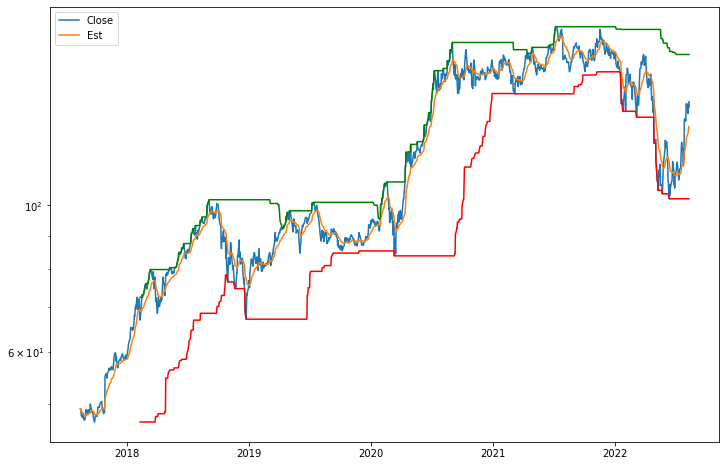

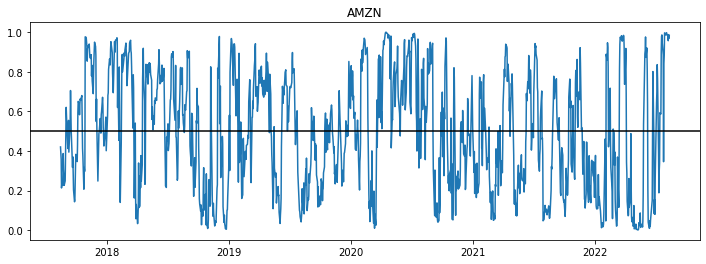

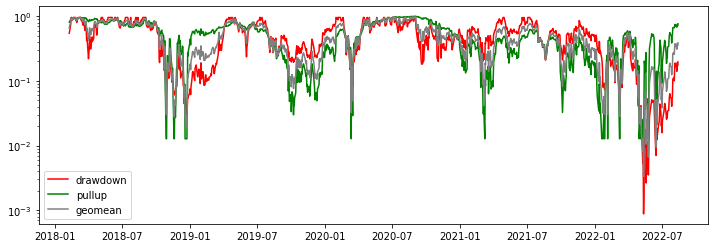

In [18]:
process_stock('AMZN', data.copy(), plot=True)

In [19]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    direction, rsi, mult, dev, drop, climb, sharpe = process_stock(
        stock, data)
    out.append([stock, direction, rsi, mult, dev, drop, climb, sharpe])

AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMZN... ANET... ASML... AXON... BROS... BYND... CHWY... DDOG... DOCS... DOCU... DUOL... EDIT... ETSY... FLGT... GH... GMED... GOOG... INTG... ISRG... JD... LSPD... LULU... MDB... MELI... MNST... MSFT... MTCH... NVCR... NVDA... OKTA... OPEN... PANW... PAYC... PINS... QDEL... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... SE... SHOP... SNOW... TASK... TDOC... TEAM... TREX... TTD... TTWO... TWLO... TWTR... UPST... VEEV... VLD... XPEV... ZEN... ZM... 

In [20]:
out = pd.DataFrame(
    data=out, 
    columns=['stock', 'direction', 'RSI', 'fair_value_mult', 
             'dev_quantile', 'drop','climb', 'sharpe'])
out['geomean'] = np.sqrt(out['drop'] * out.climb)
out['score'] = (out.fair_value_mult
                * out.dev_quantile
                * out['drop']
                * out.climb) ** (1/4) 
out['RSIRev'] = 1 - out.RSI
out = out[['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
           'dev_quantile', 'drop', 'climb','geomean', 'score', 
           'sharpe']]
out.RSI.fillna(out.RSI.median())
out.RSIRev.fillna(out.RSIRev.median())

out.sort_values('stock')

,stock,direction,RSI,RSIRev,fair_value_mult,dev_quantile,drop,climb,geomean,score,sharpe
0,AAPL,1,0.919679,0.080321,0.988880,0.988880,0.623789,0.628194,0.625987,0.786782,1.098222
1,ABMD,1,0.693173,0.306827,0.673550,0.673550,0.606167,0.645815,0.625677,0.649173,0.517522
2,ABNB,1,0.972973,0.027027,0.961995,0.961995,0.286195,0.959596,0.524053,0.710026,0.176002
3,ADBE,1,0.836145,0.163855,0.977760,0.977760,0.464317,0.462555,0.463435,0.673148,0.785410
4,ADYEY,1,0.783593,0.216407,0.925104,0.925104,0.314908,0.750419,0.486120,0.670605,1.033687
...,...,...,...,...,...,...,...,...,...,...,...
59,VEEV,1,0.687550,0.312450,0.613979,0.613979,0.716300,0.728634,0.722441,0.666006,0.831099
60,VLD,1,1.000000,0.000000,0.989796,0.989796,0.406716,1.000000,0.637743,0.794503,-0.121692
61,XPEV,0,0.339583,0.660417,0.522267,0.522267,0.451351,0.235135,0.325774,0.412481,0.482030
62,ZEN,1,0.541365,0.458635,0.501986,0.501986,0.039648,0.547137,0.147284,0.271909,0.684004


In [21]:
out.geomean.quantile([0.05, 0.99])

0.05    0.142694
0.99    0.989392
Name: geomean, dtype: float64

In [22]:
out.to_csv('individ_quantiles.csv', index=False)

In [23]:
!open individ_quantiles.csv